## Observations and Insights 

In [1]:
# Colby Alexander Hoke
# UNC Data Analytics Bootcamp, June 2020
# CC-BY-SA
# --------------------------------------
# INPUT:
# Mouse CSV, formatted as: Mouse ID, Drug Regimen, Sex, Age_months, Weight (g)
# Study CSV, formatted as: Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites
# 
# RETURN: Several analyses, detailed below
# --------------------------------------

# Dependencies and setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import random

# Set our random seed, to reproduce results 
# This is used much later and is needlessly fancy
random.seed(55)

# Study data files
mouse_metadata_path = 'data/Mouse_metadata.csv'
study_results_path = 'data/Study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how = 'outer')

# Display the dataframe
study_merged_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Check the number of mice in the DataFrame.
total_entries = study_merged_df['Mouse ID'].count()
unique_mice = study_merged_df['Mouse ID'].nunique()

print(f'Total entries: {total_entries}. Unique mice: {unique_mice}.')



Total entries: 1893. Unique mice: 249.


In [3]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicated_mice_index = study_merged_df[study_merged_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]

# Display dataframe
duplicated_mice_index

# Note: It looks like mouse g989 is duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# All of the data for mouse g989
mouse_g989_data = study_merged_df.loc[study_merged_df['Mouse ID'] == 'g989']

# Display the dataframe
mouse_g989_data

# Note: Looks like g989 had 13 total entries


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
study_clean_df = study_merged_df.drop(mouse_g989_data.index)

# Display the dataframe
study_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
total_entries_clean = study_clean_df['Mouse ID'].count()
unique_mice_clean = study_clean_df['Mouse ID'].nunique()

print(f'Total entries: {total_entries_clean}. Unique mice: {unique_mice_clean}.')

# Note: We've dropped a mouse entirely and now have 13 fewer rows of data

Total entries: 1880. Unique mice: 248.


## Summary Statistics

In [7]:
# Generate a summary statistics table of
# mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end

tumor_mean = study_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().rename('Mean')
tumor_median = study_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median().rename('Median')
tumor_var = study_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var().rename('Variance')
tumor_std = study_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std().rename('Std. Dev.')
tumor_sem = study_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem().rename('SEM')

summary_df = pd.concat([tumor_mean, tumor_median,tumor_var,tumor_std,tumor_sem], axis=1)

# Display the dataframe
summary_df

,Mean,Median,Variance,Std. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.

condensed_summary_df = study_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([np.mean,np.median,np.var,np.std,st.sem])    

# Display the dataframe
condensed_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

Text(0, 0.5, 'Number of Mice')

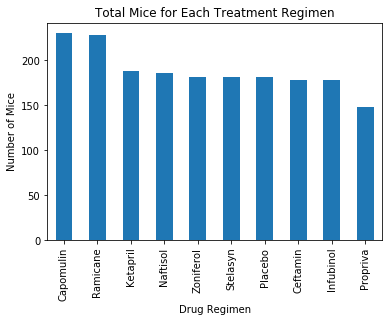

In [9]:
# Generate a bar plot using both Pandas's DataFrame.plot() that shows
# the number of total mice for each treatment regimen throughout the course of the study.
treatment_bar = study_clean_df['Drug Regimen'].value_counts().plot(kind='bar',title='Total Mice for Each Treatment Regimen')

# Clean up the plot
treatment_bar.set_xlabel('Drug Regimen')
treatment_bar.set_ylabel('Number of Mice')

# Note: We could call plt.show() here to remove the object print, but that's "using" matplotlib

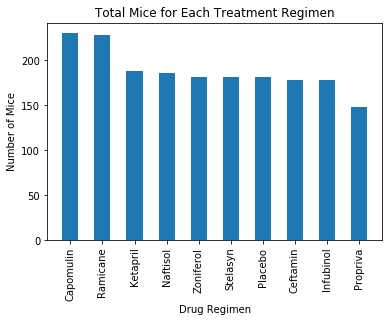

In [10]:
# Generate a bar plot using Matplotlib's pyplot that shows
# the number of total mice for each treatment regimen throughout the course of the study.

x_axis = np.arange(len(study_clean_df['Drug Regimen'].unique()))
drug_mice = study_clean_df['Drug Regimen'].value_counts()

# Make a list by counts to use as bar labels
regimen = study_clean_df['Drug Regimen'].value_counts().index.tolist()
tick_locations = [value for value in x_axis]
plt.bar(x_axis, drug_mice, width=.5)
plt.xticks(tick_locations, regimen ,rotation='vertical')
plt.title('Total Mice for Each Treatment Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')

# Display the plot
plt.show()


## Pie Plots

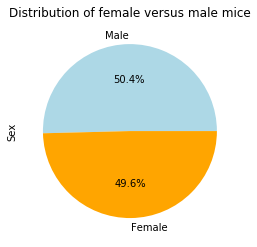

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Dropping all duplicate mouse entires, since I only care about sex for this
single_mice = study_clean_df.drop_duplicates(subset=['Mouse ID'])

# Fancy it up
colors = ['lightblue','orange']

# Count the values per sex and plot
single_mice['Sex'].value_counts().plot(kind='pie',title="Distribution of female versus male mice", colors = colors, autopct='%1.1f%%')

# Note: We could call plt.show() here to remove the object print, but that's "using" matplotlib

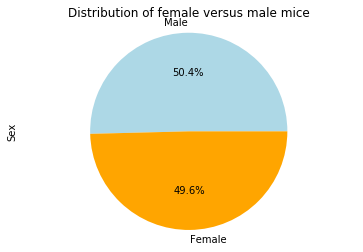

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Get the values for male and female and store in a list, Male first
sex_data = [single_mice.Sex.str.count('Male').sum(), single_mice.Sex.str.count('Female').sum()]

# Make labels and set colors
labels = 'Male', 'Female'
colors = ['lightblue','orange']

# Changeme to make the chart more fun
explode = (0, 0)

# Plot the data
plt.pie(sex_data, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of female versus male mice')
plt.ylabel('Sex')
plt.axis('equal')

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Get last entry for each mouse
last_mouse = study_clean_df.groupby(['Mouse ID']).tail(1)

# ----------------------
# Since we have to do the same calculations for each drug, let's make a function
# This takes in a drug regimen name and calculates quartiles, iqr, and the bounds
# An inner loop compares tumore volume to bounds to identify outliers
# iterrows() isn't very efficient, but the dataset is relatively small
# ----------------------
def get_quartiles(regimen):
    regimen_df = last_mouse.loc[last_mouse['Drug Regimen'] == regimen]
    quartiles = regimen_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Print the IQR for each regimen
    print(f'{regimen} IQR: {round(iqr,4)}.')
   
    # Let's iterate through the filtered dataframe to see if we have outliers and print those
    for index, row in regimen_df.iterrows():
        if row['Tumor Volume (mm3)'] > upper_bound:
            print(f'{regimen} upper outlier: Mouse {row["Mouse ID"]}.')
        elif row['Tumor Volume (mm3)'] < lower_bound:
            print(f'{regimen} lower outlier: Mouse {row["Mouse ID"]}.')
    
    # Separate results        
    print(' ')
    return;
# ----------------------

# List of our promising drug regimens (from readme file)
promising_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Iterate through the list and let the function do its work
for drug in promising_regimens:
    get_quartiles(drug);


Capomulin IQR: 7.7819.
 
Ramicane IQR: 9.0985.
 
Infubinol IQR: 11.4771.
Infubinol lower outlier: Mouse c326.
 
Ceftamin IQR: 15.5778.
 


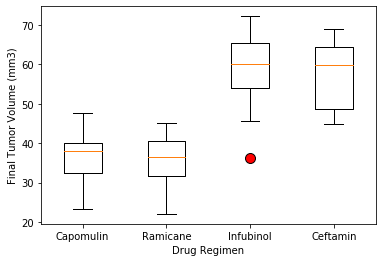

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Group all of the last entry for each mouse by drug regimen
last_mouse_capomulin = last_mouse.loc[last_mouse['Drug Regimen'] == 'Capomulin']
last_mouse_ramicane = last_mouse.loc[last_mouse['Drug Regimen'] == 'Ramicane']
last_mouse_infubinol = last_mouse.loc[last_mouse['Drug Regimen'] == 'Infubinol']
last_mouse_ceftamin = last_mouse.loc[last_mouse['Drug Regimen'] == 'Ceftamin']

# Put tumor volume data from each treatment into lists
capomulin_tumor_data = last_mouse_capomulin['Tumor Volume (mm3)'].tolist()
ramicane_tumor_data = last_mouse_ramicane['Tumor Volume (mm3)'].tolist()
infubinol_tumor_data = last_mouse_infubinol['Tumor Volume (mm3)'].tolist()
ceftamin_tumor_data = last_mouse_ceftamin['Tumor Volume (mm3)'].tolist()

# Make a dictionary to use values and keys for plotting
drug_dict = {
    'Capomulin':capomulin_tumor_data,
    'Ramicane':ramicane_tumor_data,
    'Infubinol':infubinol_tumor_data,
    'Ceftamin':ceftamin_tumor_data}

# Build subplots
fig, ax = plt.subplots()

# Make outliers stand out
redcircle = dict(markerfacecolor='r', marker='o', markersize=10)
ax.boxplot(drug_dict.values(), flierprops=redcircle)
ax.set_xticklabels(drug_dict.keys())

# Add labels
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xlabel('Drug Regimen')

# Display the plots
plt.show()

## Line and Scatter Plots

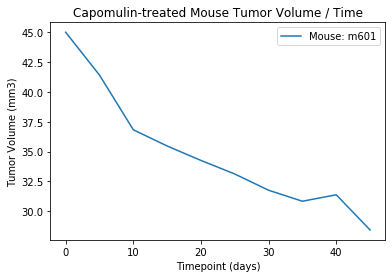

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Get list of all of the mice treated with Capomulin
capomulin_mice_list = last_mouse_capomulin['Mouse ID'].tolist()

# Let's have fun and grab a random mouse and its associated data
chosen_mouse = random.choice(capomulin_mice_list)
chosen_mouse_df = study_clean_df.loc[study_clean_df['Mouse ID'] == chosen_mouse]

# Plot the line graph for our random mouse
# Add a legend to identify which random mouse we're seeing
chosen_mouse_df.plot.line(x='Timepoint', y='Tumor Volume (mm3)', label=(f'Mouse: {chosen_mouse}'))

# Add labels
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin-treated Mouse Tumor Volume / Time')

# Display the plot
plt.show()

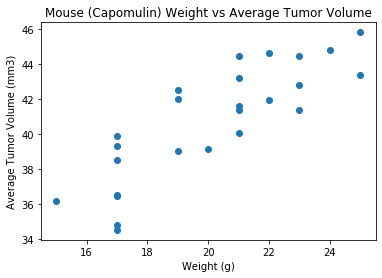

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Make a datafram of all mice trated with Capomulin
capomulin_mice_df = study_clean_df.loc[study_clean_df['Drug Regimen'] == 'Capomulin']

# Group those mice by ID and weight (weight doesn't change over time), then get the average tumor volume
grouped_avg_tumor = capomulin_mice_df.groupby(['Mouse ID', 'Weight (g)'])['Tumor Volume (mm3)'].mean().reset_index()

# Get values for our chart
weights = grouped_avg_tumor['Weight (g)']
avg_tumor = grouped_avg_tumor['Tumor Volume (mm3)']

# Build the scatter plot
plt.scatter(weights,avg_tumor)

# Add labels
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.title('Mouse (Capomulin) Weight vs Average Tumor Volume')

# Display the plot
plt.show()

## Correlation and Regression

The Pearson Correlation Coefficient is: 0.84, therefore:
There is a very strong association.


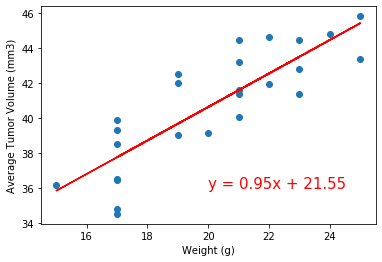

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Find the pearson r, grab the correlation coefficient, and round to 2 decimal places, then print
correlation = st.pearsonr(weights,avg_tumor)
pearson = round(correlation[0],2)
print(f'The Pearson Correlation Coefficient is: {pearson}, therefore:')

# Let's print out what that actually means, because I got nothin' but time, baby
if pearson == 0:
    print('There is no association.')
elif 0 < pearson < 0.25:
    print('There is a negligible association.')
elif 0.25 < pearson < 0.5:
    print('There is a weak association.')  
elif 0.5 < pearson < 0.75:
    print('There is a moderate association.')    
elif 0.75 < pearson < 1:
    print('There is a very strong association.')
else:
    print('There is a perfect association.')

# Now let's plot this
slope, intercept, rvalue, pvalue, stderr = linregress(weights, avg_tumor)
regress_values = weights * slope + intercept

# Build the line equation to print as an annotation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot everything
plt.scatter(weights,avg_tumor)
plt.plot(weights,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()
